In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('weather_forecast_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [4]:
data.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [5]:
data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [6]:
label_encoders = {}
columns_to_encode = ['Rain']

for column in columns_to_encode:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column])
    label_encoders[column] = le
data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Rain_encoded
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain,0


<Axes: >

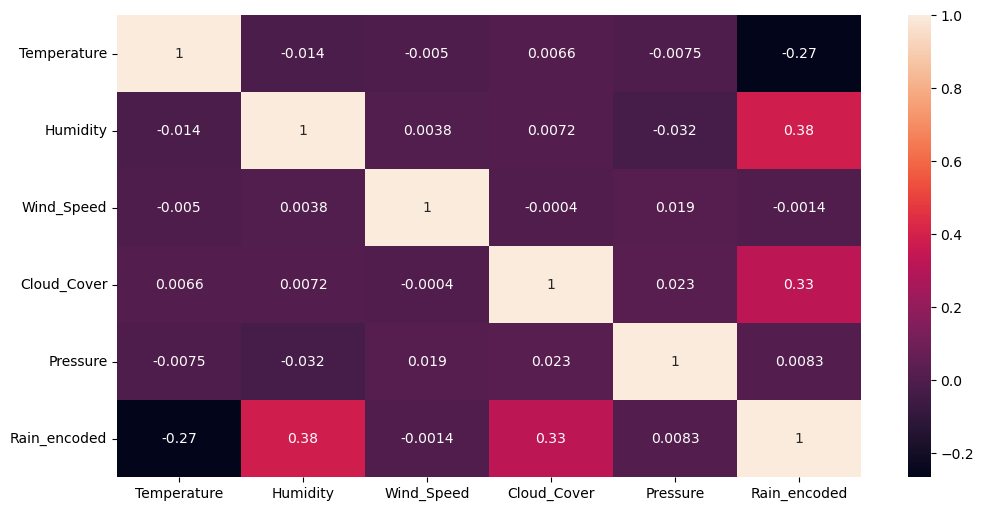

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data.drop('Rain',axis=1).corr(),annot=True)

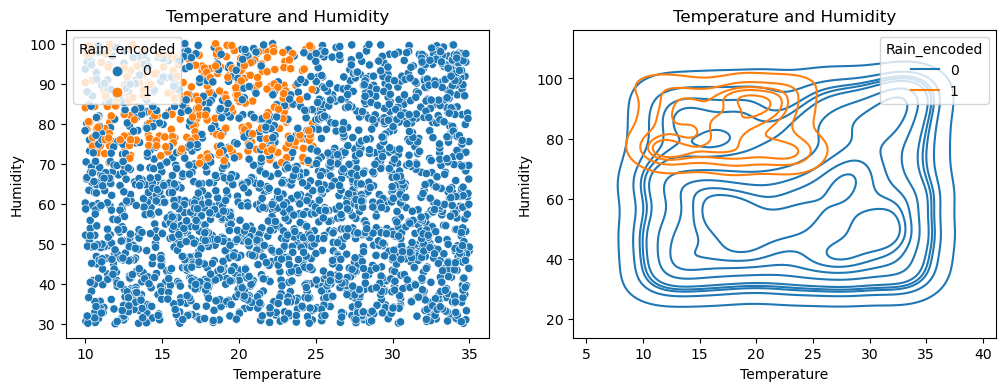

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Temperature and Humidity')
sns.scatterplot(x=data['Temperature'],y=data['Humidity'],hue=data['Rain_encoded']);

plt.subplot(1,2,2)
plt.title('Temperature and Humidity')
sns.kdeplot(x=data['Temperature'],y=data['Humidity'],hue=data['Rain_encoded']);

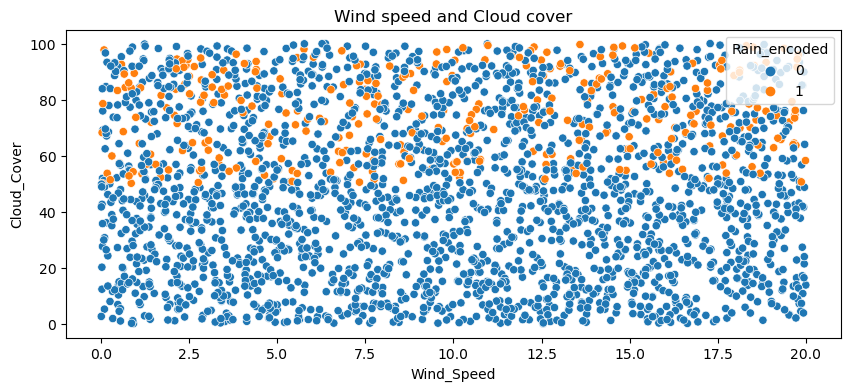

In [9]:
plt.figure(figsize=(10,4))
plt.title('Wind speed and Cloud cover')
sns.scatterplot(x=data['Wind_Speed'],y=data['Cloud_Cover'],hue=data['Rain_encoded']);

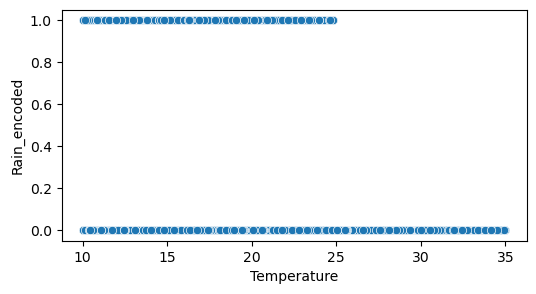

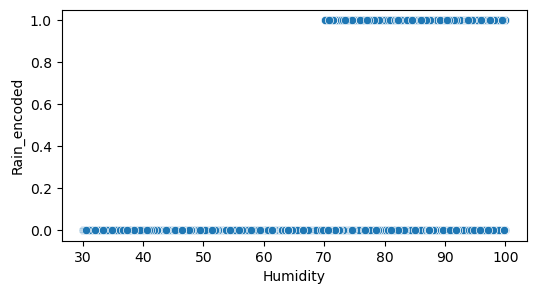

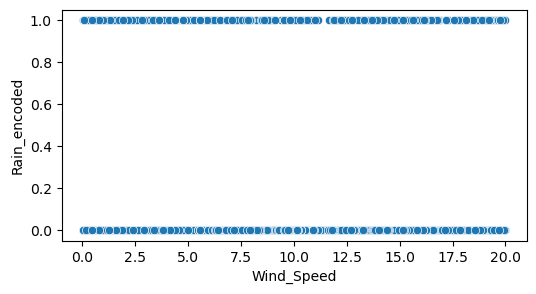

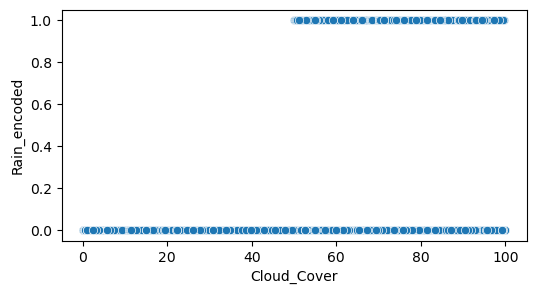

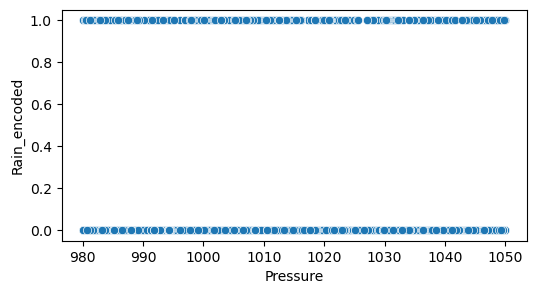

In [10]:
columns = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
for i in columns:
    plt.figure(figsize=(6,3))
    sns.scatterplot(x=data[i],y=data['Rain_encoded'])
    plt.show()

In [11]:
X = data.drop(['Rain','Rain_encoded'],axis=1)
y = data['Rain_encoded']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_predict = model.predict(X_test)

The accuracy of Logistic Regression is 0.9387


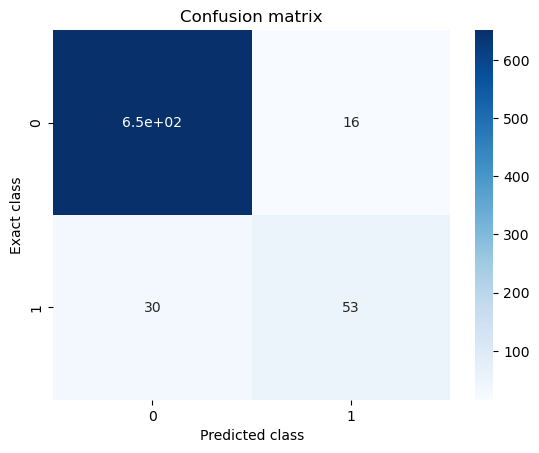

In [14]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix,annot=True,cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

In [15]:
import pandas as pd
import numpy as np

# Function to get user input and predict whether it will rain or not
def predict_rain():
    # Input values from the user
    temperature = float(input("Enter Temperature (°C): "))
    humidity = float(input("Enter Humidity (%): "))
    wind_speed = float(input("Enter Wind Speed (km/h): "))
    cloud_cover = float(input("Enter Cloud Cover (%): "))
    pressure = float(input("Enter Pressure (hPa): "))

    # Create a DataFrame for the input values to match the model's feature names
    input_data = pd.DataFrame([[temperature, humidity, wind_speed, cloud_cover, pressure]],
                              columns=['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'])

    # Predict with the trained model
    prediction = model.predict(input_data)

    # Output the prediction
    if prediction[0] == 1:
        print("Prediction: Rain")
    else:
        print("Prediction: No Rain")

# Call the function to get input and predict
predict_rain()


Enter Temperature (°C): 20
Enter Humidity (%): 80
Enter Wind Speed (km/h): 100
Enter Cloud Cover (%): 80
Enter Pressure (hPa): 100
Prediction: Rain


In [17]:
import joblib

model = LogisticRegression()
model.fit(X_train, y_train)

# Simpan model
joblib.dump(model, 'weather_predict_model.sav')

['weather_predict_model.sav']